In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_excel(os.getcwd()+"\Sales_Data.xlsx")


In [3]:
df.head()

,Customer,Percent Gross Profit,Gross Sales,Gross Profit,Industry Code,Competitive Rating*
0,4,0.22,249,54.78,5,1
1,5,0.21,476,99.96,5,1
2,44,0.37,31019,11477.03,6,1
3,19,0.60,3864,2318.40,7,1
4,24,0.32,4711,1507.52,7,1


In [4]:
df.describe()

,Customer,Percent Gross Profit,Gross Sales,Gross Profit,Industry Code,Competitive Rating*
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,30.500000,0.211925,25016.500000,4239.164583,4.483333,3.000000
std,17.464249,0.114014,36344.568583,5811.729263,1.899970,1.089239
min,1.000000,0.030000,170.000000,40.600000,1.000000,1.000000
25%,15.750000,0.140000,2645.750000,435.060000,3.000000,2.000000
50%,30.500000,0.200000,6760.000000,1662.430000,5.000000,3.000000
75%,45.250000,0.245000,32171.000000,5690.385000,6.000000,4.000000
max,60.000000,0.600000,179101.000000,25379.340000,7.000000,5.000000


In [5]:
df.columns=['customer','percent_gross_profit','gross_sales','gross_profit','industry_code','competitive_rating']

In [6]:
df.head()

,customer,percent_gross_profit,gross_sales,gross_profit,industry_code,competitive_rating
0,4,0.22,249,54.78,5,1
1,5,0.21,476,99.96,5,1
2,44,0.37,31019,11477.03,6,1
3,19,0.60,3864,2318.40,7,1
4,24,0.32,4711,1507.52,7,1


In [7]:
df = df.drop(['customer','percent_gross_profit'],axis=1)

In [8]:
df.head()

,gross_sales,gross_profit,industry_code,competitive_rating
0,249,54.78,5,1
1,476,99.96,5,1
2,31019,11477.03,6,1
3,3864,2318.40,7,1
4,4711,1507.52,7,1


array([[<AxesSubplot:title={'center':'gross_sales'}>,
        <AxesSubplot:title={'center':'gross_profit'}>],
       [<AxesSubplot:title={'center':'industry_code'}>,
        <AxesSubplot:title={'center':'competitive_rating'}>]],
      dtype=object)

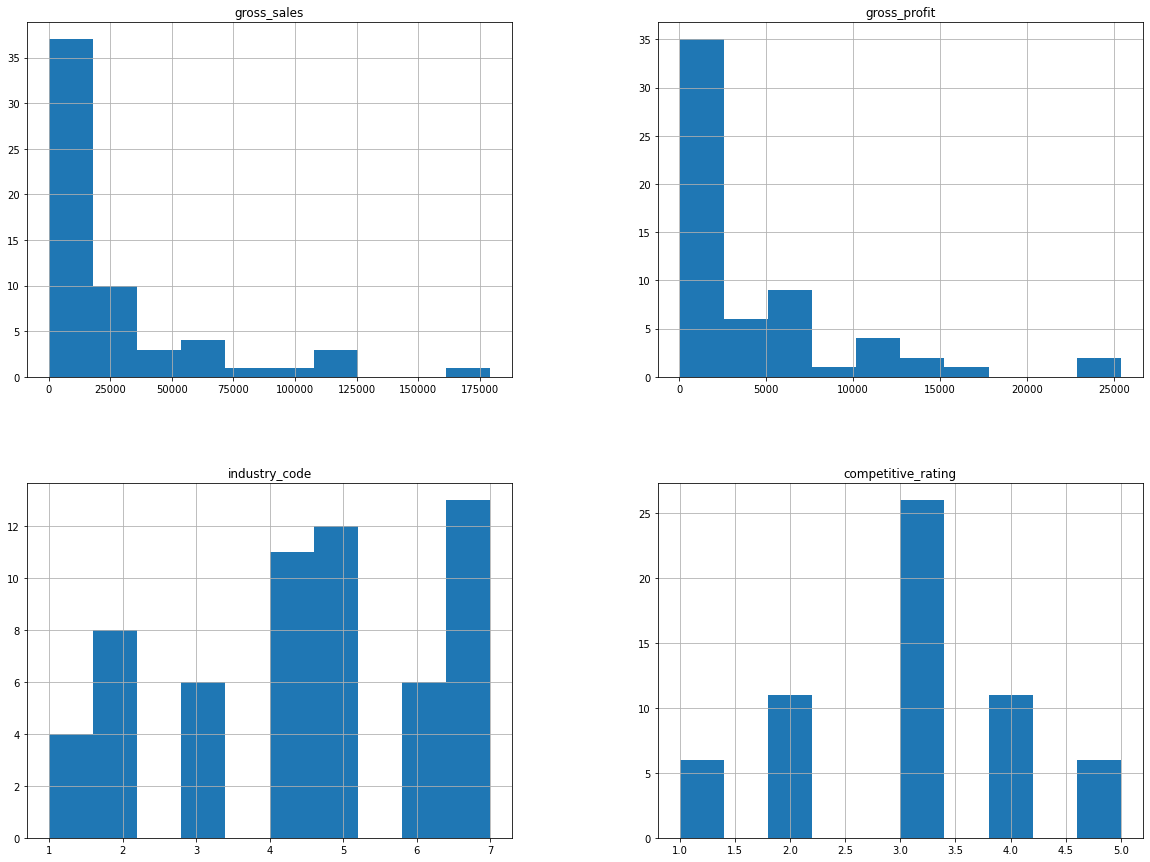

In [9]:
df.hist(bins=10,figsize=(20,15))

# scaling using z scores

In [10]:
from scipy.stats import zscore

df_scaled = df.apply(zscore)
df_scaled.head()

,gross_sales,gross_profit,industry_code,competitive_rating
0,-0.687214,-0.726066,0.274229,-1.85164
1,-0.680916,-0.718226,0.274229,-1.85164
2,0.166549,1.255899,0.804995,-1.85164
3,-0.586910,-0.333287,1.335760,-1.85164
4,-0.563409,-0.473989,1.335760,-1.85164


In [11]:
X.describe()

,gross_sales,gross_profit,industry_code,competitive_rating
count,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01
mean,-2.683039e-17,4.255855e-17,-5.551115e-17,1.480297e-17
std,1.008439e+00,1.008439e+00,1.008439e+00,1.008439e+00
min,-6.894064e-01,-7.285260e-01,-1.848834e+00,-1.851640e+00
25%,-6.207127e-01,-6.600802e-01,-7.873024e-01,-9.258201e-01
50%,-5.065562e-01,-4.471095e-01,2.742289e-01,0.000000e+00
75%,1.985132e-01,2.518127e-01,8.049946e-01,9.258201e-01
max,4.275324e+00,3.668199e+00,1.335760e+00,1.851640e+00


<AxesSubplot:>

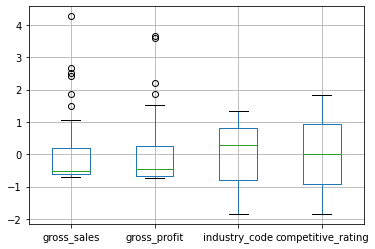

In [12]:
df_scaled.boxplot()

# Scaling using standard scalar

In [13]:
# from sklearn.preprocessing import StandardScaler
# y = StandardScaler().fit_transform(X)
# y

In [14]:
X=df_scaled
X.head()

,gross_sales,gross_profit,industry_code,competitive_rating
0,-0.687214,-0.726066,0.274229,-1.85164
1,-0.680916,-0.718226,0.274229,-1.85164
2,0.166549,1.255899,0.804995,-1.85164
3,-0.586910,-0.333287,1.335760,-1.85164
4,-0.563409,-0.473989,1.335760,-1.85164


In [15]:
from sklearn.decomposition import PCA

In [16]:
pca= PCA(n_components=2)
X=pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

In [17]:
X

array([[-1.52432404e+00,  1.06245215e+00],
       [-1.51486360e+00,  1.06534341e+00],
       [ 3.02159203e-01,  2.09218420e+00],
       [-1.31228897e+00,  1.95468694e+00],
       [-1.38809839e+00,  1.91900725e+00],
       [-1.56786147e-01,  2.29290803e+00],
       [-1.02101456e+00, -1.05360605e+00],
       [-1.08250757e+00, -6.69217231e-01],
       [-1.15317255e+00,  1.17720618e-01],
       [-1.12134640e+00,  1.29482269e-01],
       [-1.13589919e+00,  1.21748849e-01],
       [ 6.35518345e-01,  1.15612491e+00],
       [ 1.09787736e+00,  1.62725160e+00],
       [-1.23595494e+00,  1.30627601e+00],
       [-1.20091918e+00,  1.30931859e+00],
       [-8.30659372e-01,  1.43179231e+00],
       [ 9.79190395e-01,  1.98782880e+00],
       [-5.34937151e-01, -1.56297420e+00],
       [ 5.90050950e-01, -1.24609338e+00],
       [-7.89392930e-01, -1.23453606e+00],
       [-7.32738956e-01, -1.22090841e+00],
       [-5.72776159e-01, -1.16701752e+00],
       [-2.26770846e-01, -1.05916911e+00],
       [ 4.

In [18]:
#X = pd.DataFrame(data = X)

In [19]:
#X.head(10)

In [20]:
import scipy.cluster.hierarchy as sch


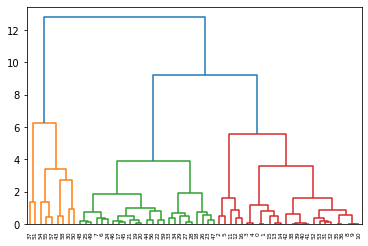

In [21]:
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))

5 clusters visble

In [22]:
# from scipy.cluster.hierarchy import dendrogram, linkage
# z_final = linkage(X, 'ward' , metric = 'euclidean')
# dendrogram(z_final, truncate_mode = 'lastp', p = 10)
# plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(X)
y_hc

array([2, 2, 4, 2, 2, 4, 0, 0, 2, 2, 2, 4, 4, 2, 2, 2, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2, 3, 2, 2, 2, 2, 2, 1,
       0, 0, 0, 0, 0, 0, 1, 3, 2, 2, 1, 1, 0, 1, 1, 0], dtype=int64)

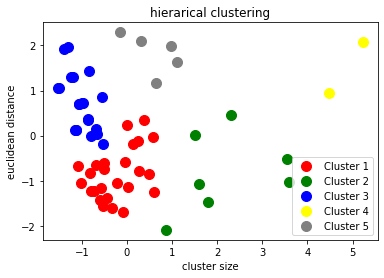

In [24]:
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label = 'Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='green', label = 'Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='blue', label = 'Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='yellow', label = 'Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='grey', label = 'Cluster 5')

plt.title('hierarical clustering')
plt.xlabel('cluster size')
plt.ylabel('euclidean distance')
plt.legend()
plt.show()

In [25]:
df['y_hc']=y_hc
df_y_hc = df.groupby('y_hc').mean()
y_hc_freq = df['y_hc'].value_counts().sort_index()
df_y_hc['cluster count'] = y_hc_freq
df_y_hc

,gross_sales,gross_profit,industry_code,competitive_rating,cluster count
y_hc,,,,,
0,14157.120000,2366.084000,3.080000,3.320000,25
1,80004.857143,10111.834286,3.285714,4.428571,7
2,4045.571429,921.502143,6.047619,2.428571,21
3,149977.500000,25226.740000,5.500000,3.500000,2
4,40423.200000,10921.982000,6.200000,1.600000,5
